In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# set style
mpl.style.use("ggplot")

# plot inline
%matplotlib inline

In [27]:
import pandas as pd
df = pd.read_pickle("../../cdhitResult/ec0913_df")
cluster_detail = pd.read_pickle("../../cdhitResult/cluster_detail_df")

# core genome, accessory genome
gene_count = df.sum(axis = 0)
core = gene_count.loc[gene_count == 59] 
accessory = gene_count.loc[gene_count != 59]
unique = gene_count.loc[gene_count == 1]
print(len(core), len(accessory), len(unique))

# determine how conserved they are: they are all similar
core_sim = cluster_detail.loc[core.index.values, 'mean similarity'].mean()
acc_sim = cluster_detail.loc[accessory.index.values, 'mean similarity'].mean()
print(core_sim, acc_sim)

# determine the length gap between representing sequence and other members of the family
core_len_gap_se = cluster_detail.loc[core.index.values, 'representing gene length'] - cluster_detail.loc[core.index.values, 'mean length']
accessory_len_gap_se = cluster_detail.loc[accessory.index.values, 'representing gene length'] - cluster_detail.loc[accessory.index.values, 'mean length']
print(core_len_gap_se.mean(), accessory_len_gap_se.mean())

2874 13076 5522
98.943429783 82.2062326726
329.147581819 224.352406137


In [6]:
#cog_category
with open("/home/hermuba/ecoli.cog.list") as f:
    for line in f:
        line = line.replace('\n', '')
        genome_id = line.split('\t')[0]
        protein_id = line.split('\t')[1]
        head = protein_id+'|'+genome_id
        if head in list(cluster_detail['representing gene header']):
            index = cluster_detail.loc[cluster_detail['representing gene header'] == head].index
            cluster_detail.loc[index, 'cog'] = line.split('\t')[2]
    

In [7]:
cluster_detail.loc[cluster_detail['cog'].isnull()].shape

(7877, 8)

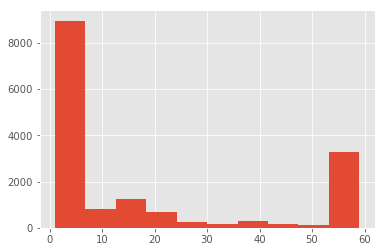

In [8]:
# pangenome distribution
gene_count.hist()

In [9]:
# add on card annotation (each member)
def card_in_cluster(cluster_name):
    count = 0
    members = cluster_detail.loc[cluster_name, 'member'].split(',')[1:] # the first element is ''
    for mem in members:
        genome_id = mem.split('|')[1]
        protein_id = mem.split('|')[0]
        
        df = pd.read_pickle("../../cdhitResult/card_detail_df/"+genome_id)
        if protein_id in df.index:
            count = count + 1
        
    return(count, count/len(members))
for clu in cluster_detail.index:
    count, portion = card_in_cluster(clu)
    cluster_detail.loc[clu, "card_portion"] = portion
    cluster_detail.loc[clu, "card_count"] = count


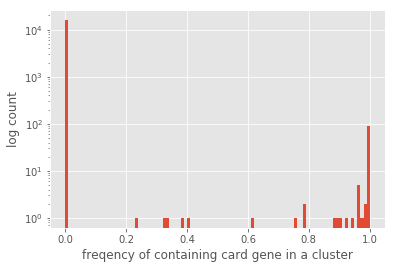

In [10]:
fig, ax = plt.subplots()
cluster_detail['card_portion'].hist(bins = 100, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("freqency of containing card gene in a cluster")

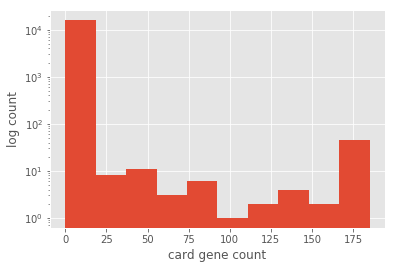

In [11]:
fig, ax = plt.subplots()
cluster_detail['card_count'].hist(bins = 10, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("card gene count")

In [12]:
#cluster_detail.to_pickle("../../cdhitResult/cluster_detail_tmp1010")

In [33]:
cluster_detail = pd.read_pickle("../../cdhitResult/cluster_detail_tmp1010")

In [17]:
ct = pd.DataFrame(columns = ['core', 'accessory', 'pangenome'])
i = 0
for index, row in df.iterrows():
    i = i + 1
    count = df.iloc[:i, :]
    
    count = count.sum(axis = 0)
    
    al = len(count.loc[count > 0])
    cr = len(count.loc[count == i])
    acc = al - core ######
    ct.loc[index, 'core'] = cr
    ct.loc[index, 'accessory'] = acc
    ct.loc[index, 'pangenome'] = al

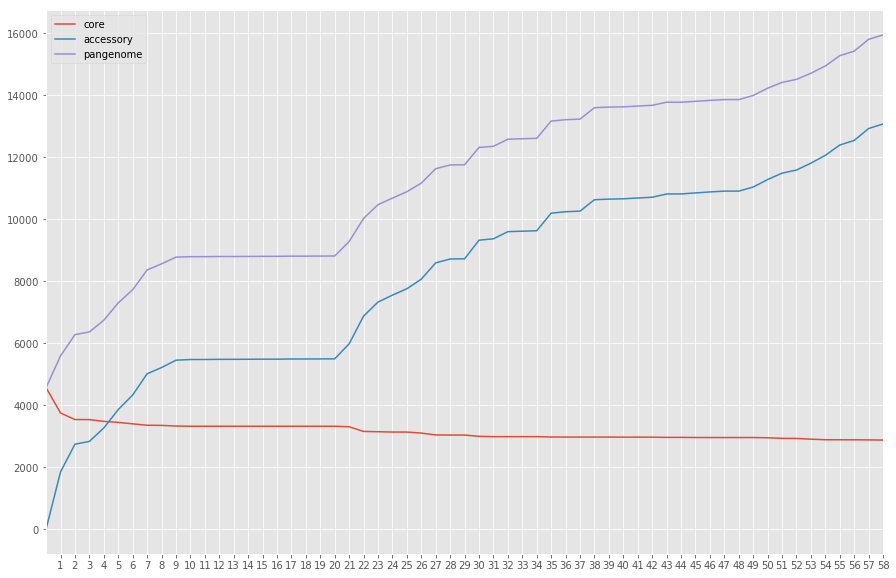

In [22]:
ct.plot(xticks = np.arange(1, 59, 1), use_index = False, figsize = (15,10))

In [68]:
# cog group
core_cog = cluster_detail.loc[list(core.index),'cog']
acc_cog = cluster_detail.loc[list(accessory.index), 'cog']


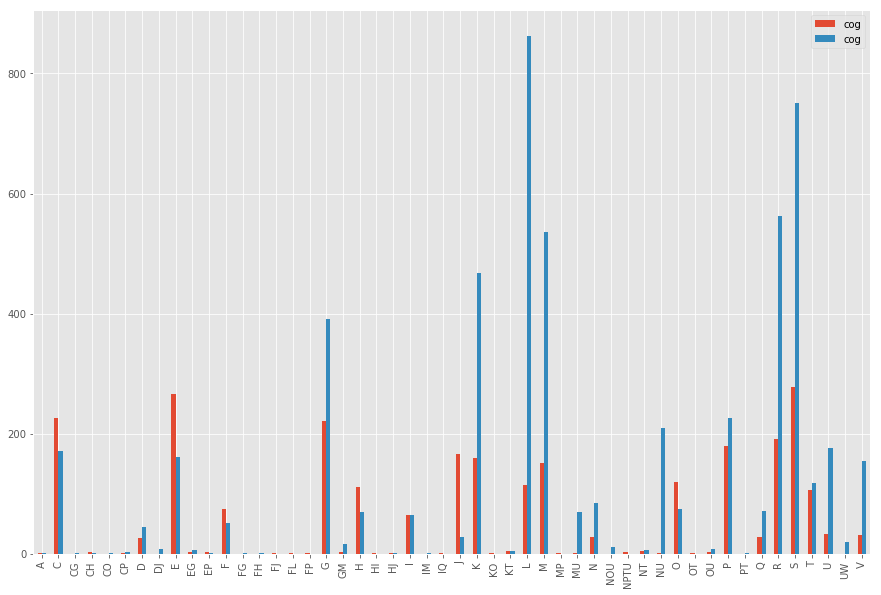

In [70]:
cog_count = pd.concat([core_cog.value_counts(), acc_cog.value_counts()], axis = 1)
cog_count.plot.bar(figsize = (15,10))

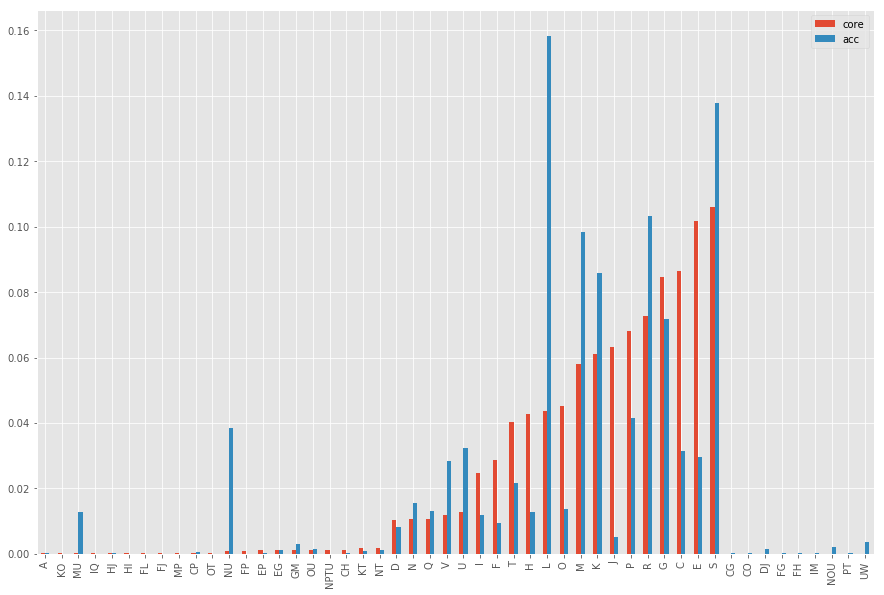

In [76]:
cog_freq = pd.concat([core_cog.value_counts(normalize = True), acc_cog.value_counts(normalize = True)], axis = 1, keys = ['core', 'acc'])
cog_freq.sort_values(by = 'core').plot.bar(figsize = (15,10))

In [80]:
len(core_cog.loc[core_cog.isnull()])/len(core_cog)

0.08663883089770355

In [81]:
len(acc_cog.loc[acc_cog.isnull()])/len(acc_cog) # more accessory genes do not have cog 

0.5833588253288468

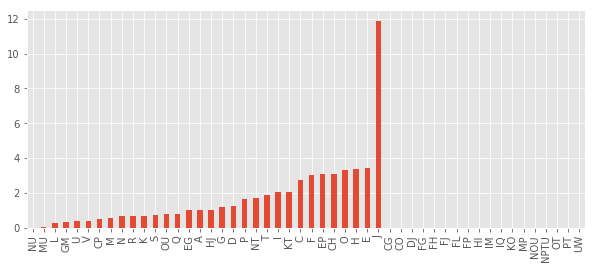

In [94]:
cog_group_ratio = cog_freq['core']/cog_freq['acc']
cog_group_ratio.sort_values().plot.bar(figsize = (10,4))

In [95]:
cog_group_ratio.sort_values()

NU       0.019861
MU       0.030079
L        0.276884
GM       0.366252
U        0.400935
V        0.415086
CP       0.518857
M        0.588554
N        0.683671
R        0.705350
K        0.711068
S        0.768268
OU       0.778286
Q        0.818479
EG       1.037714
A        1.037714
HJ       1.037714
G        1.178376
D        1.273558
P        1.643813
NT       1.729524
T        1.864368
I        2.075429
KT       2.075429
C        2.739083
F        3.052101
EP       3.113143
CH       3.113143
O        3.337514
H        3.368812
E        3.420614
J       11.880039
CG            NaN
CO            NaN
DJ            NaN
FG            NaN
FH            NaN
FJ            NaN
FL            NaN
FP            NaN
HI            NaN
IM            NaN
IQ            NaN
KO            NaN
MP            NaN
NOU           NaN
NPTU          NaN
OT            NaN
PT            NaN
UW            NaN
dtype: float64

In [101]:
card_genes = cluster_detail.loc[cluster_detail['card_portion'] > 0]
card_genes['cog'].value_counts()

V    21
G    14
M    11
K    10
H     9
T     8
P     8
R     8
J     7
S     5
L     3
C     1
O     1
E     1
Name: cog, dtype: int64

In [102]:
core_card = cluster_detail.loc[list(core.index),'card_portion']
acc_card = cluster_detail.loc[list(accessory.index), 'card_portion']


In [104]:
core_card

Cluster 55       0.000000
Cluster 72       0.000000
Cluster 83       0.000000
Cluster 90       0.000000
Cluster 115      0.000000
Cluster 140      0.000000
Cluster 142      0.000000
Cluster 145      0.000000
Cluster 150      0.000000
Cluster 153      0.000000
Cluster 164      0.000000
Cluster 175      0.000000
Cluster 185      0.000000
Cluster 187      0.000000
Cluster 192      0.000000
Cluster 209      0.237838
Cluster 215      0.000000
Cluster 218      0.000000
Cluster 222      1.000000
Cluster 229      0.000000
Cluster 247      0.000000
Cluster 248      0.000000
Cluster 252      0.000000
Cluster 256      0.000000
Cluster 261      0.000000
Cluster 275      0.000000
Cluster 280      0.000000
Cluster 281      1.000000
Cluster 284      0.000000
Cluster 285      0.000000
                   ...   
Cluster 15008    0.000000
Cluster 15117    0.000000
Cluster 15118    0.000000
Cluster 15119    0.000000
Cluster 15120    0.000000
Cluster 15121    0.000000
Cluster 15123    0.000000
Cluster 1516

In [105]:
len(core_card.loc[core_card>0])/len(core_card)

0.014961725817675714

In [106]:
len(acc_card.loc[acc_card>0])/len(acc_card)

0.005200367084735393

In [107]:
len(core_card.loc[core_card>0])

43

In [108]:
len(acc_card.loc[acc_card>0])

68